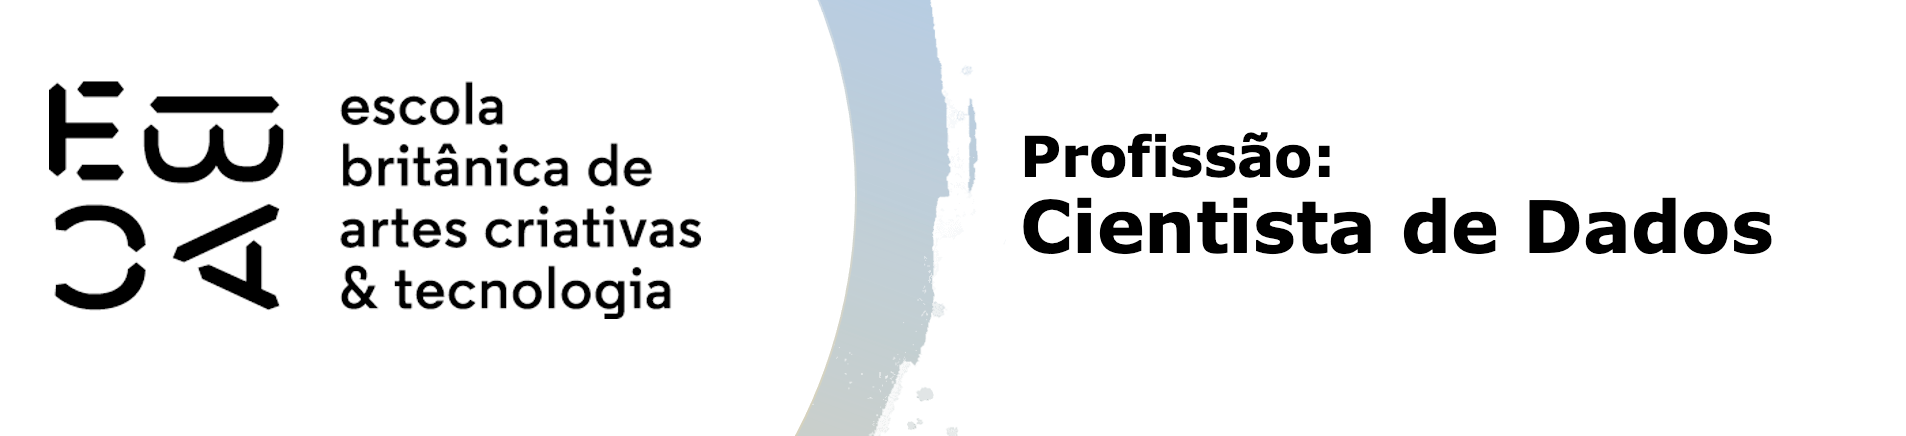

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
df = pd.read_csv('online_shoppers_intention.csv')

In [10]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [11]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [12]:
# Há registros missing?
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [13]:
# selecionando apenas variáveis numéricas
df_quant = df.select_dtypes(include="number")
df_quant.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

C:\Users\Cristina\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Cristina\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Cristina\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Cristina\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Cristina\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid

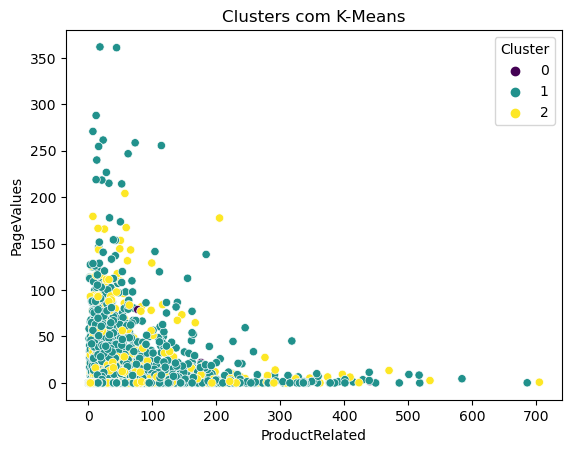

In [20]:
# selecionando as 5 principais variáveis

features = ['ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay', 'Weekend']
X = df[features]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means (com 3 clusters como exemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar clusters com 2 variáveis principais
sns.scatterplot(data=df, x='ProductRelated', y='PageValues', hue='Cluster', palette='viridis')
plt.title("Clusters com K-Means")
plt.show()

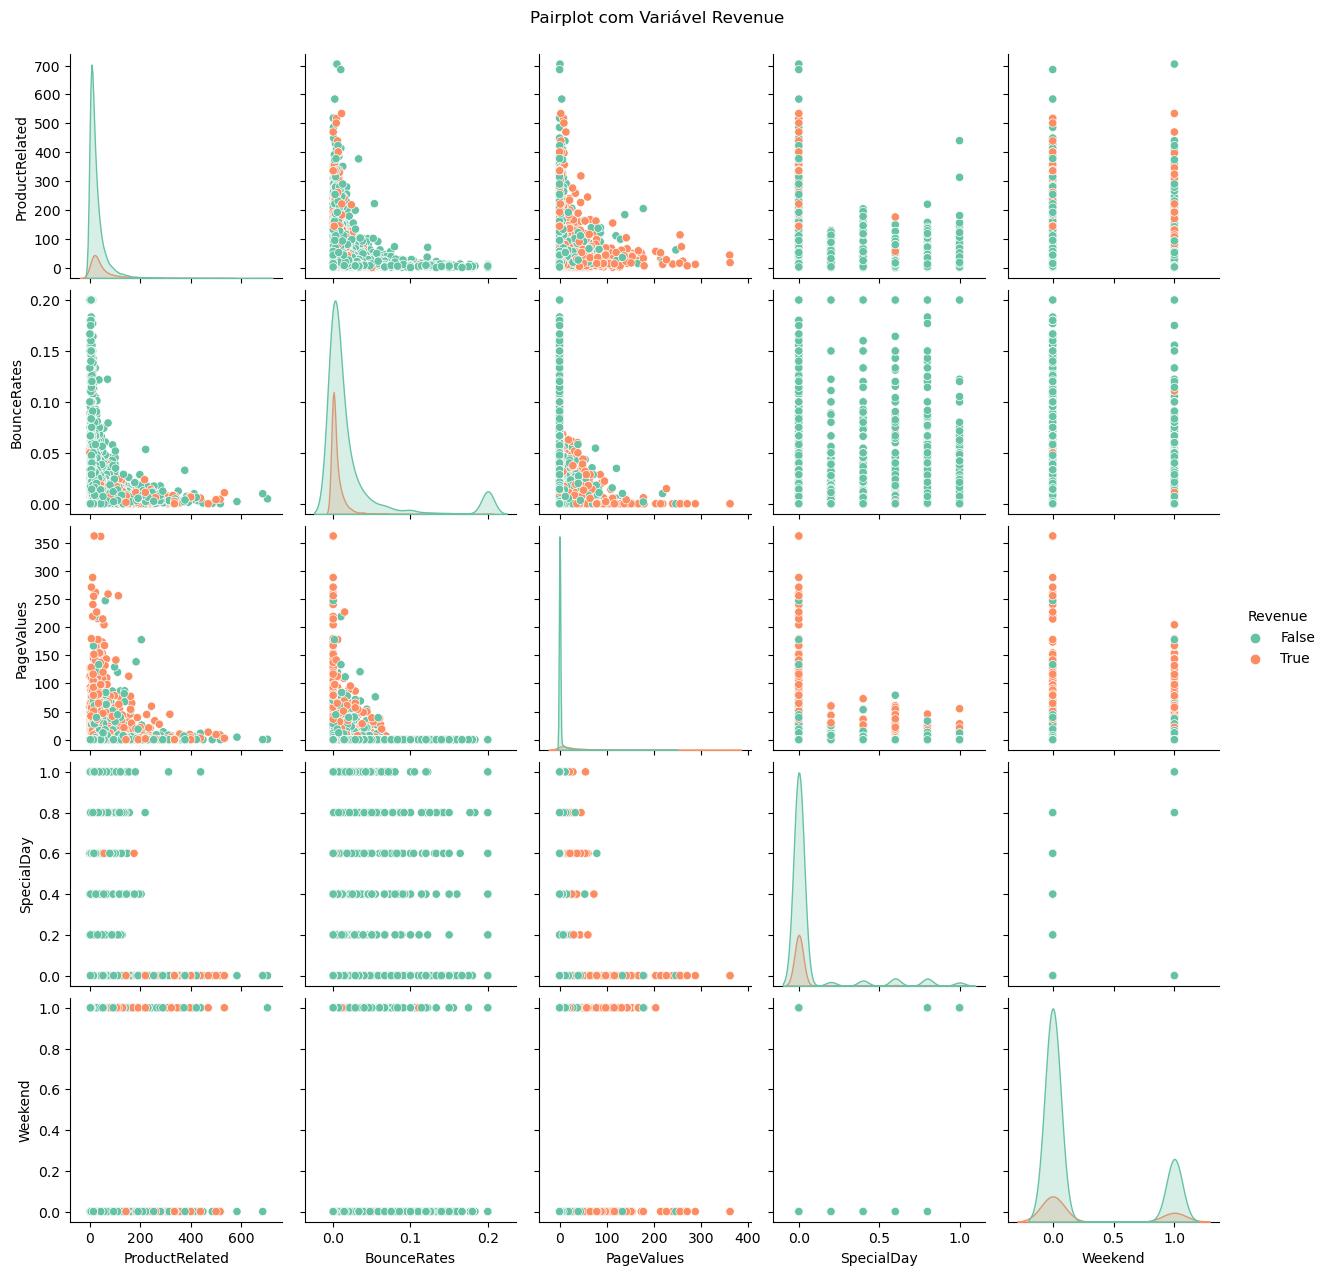

In [22]:
# Lista de variáveis + Revenue
pairplot_features = ['ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay', 'Weekend', 'Revenue']

# Gerar pairplot colorido pela variável Revenue
sns.pairplot(df[pairplot_features], hue='Revenue', diag_kind='kde', palette='Set2')

plt.suptitle("Pairplot com Variável Revenue", y=1.02)
plt.show()

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

### -BounceRates:	Percentual de rejeição – indica sessões superficiais
### -ExitRates:	Frequência de encerramento da sessão na página – indica fim da navegação
### -PageValues: Valor médio de páginas antes de uma conversão – indica intensidade de navegação
### -Informational_Duration:	Tempo gasto com informações – pode indicar pesquisa pré-compra


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [23]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm='lloyd')
kmeans.fit(df[pairplot_features])

KMeans(max_iter=600, n_clusters=3)

In [24]:
padronizador = StandardScaler()
df_padronizado = padronizador.fit_transform(df[pairplot_features])

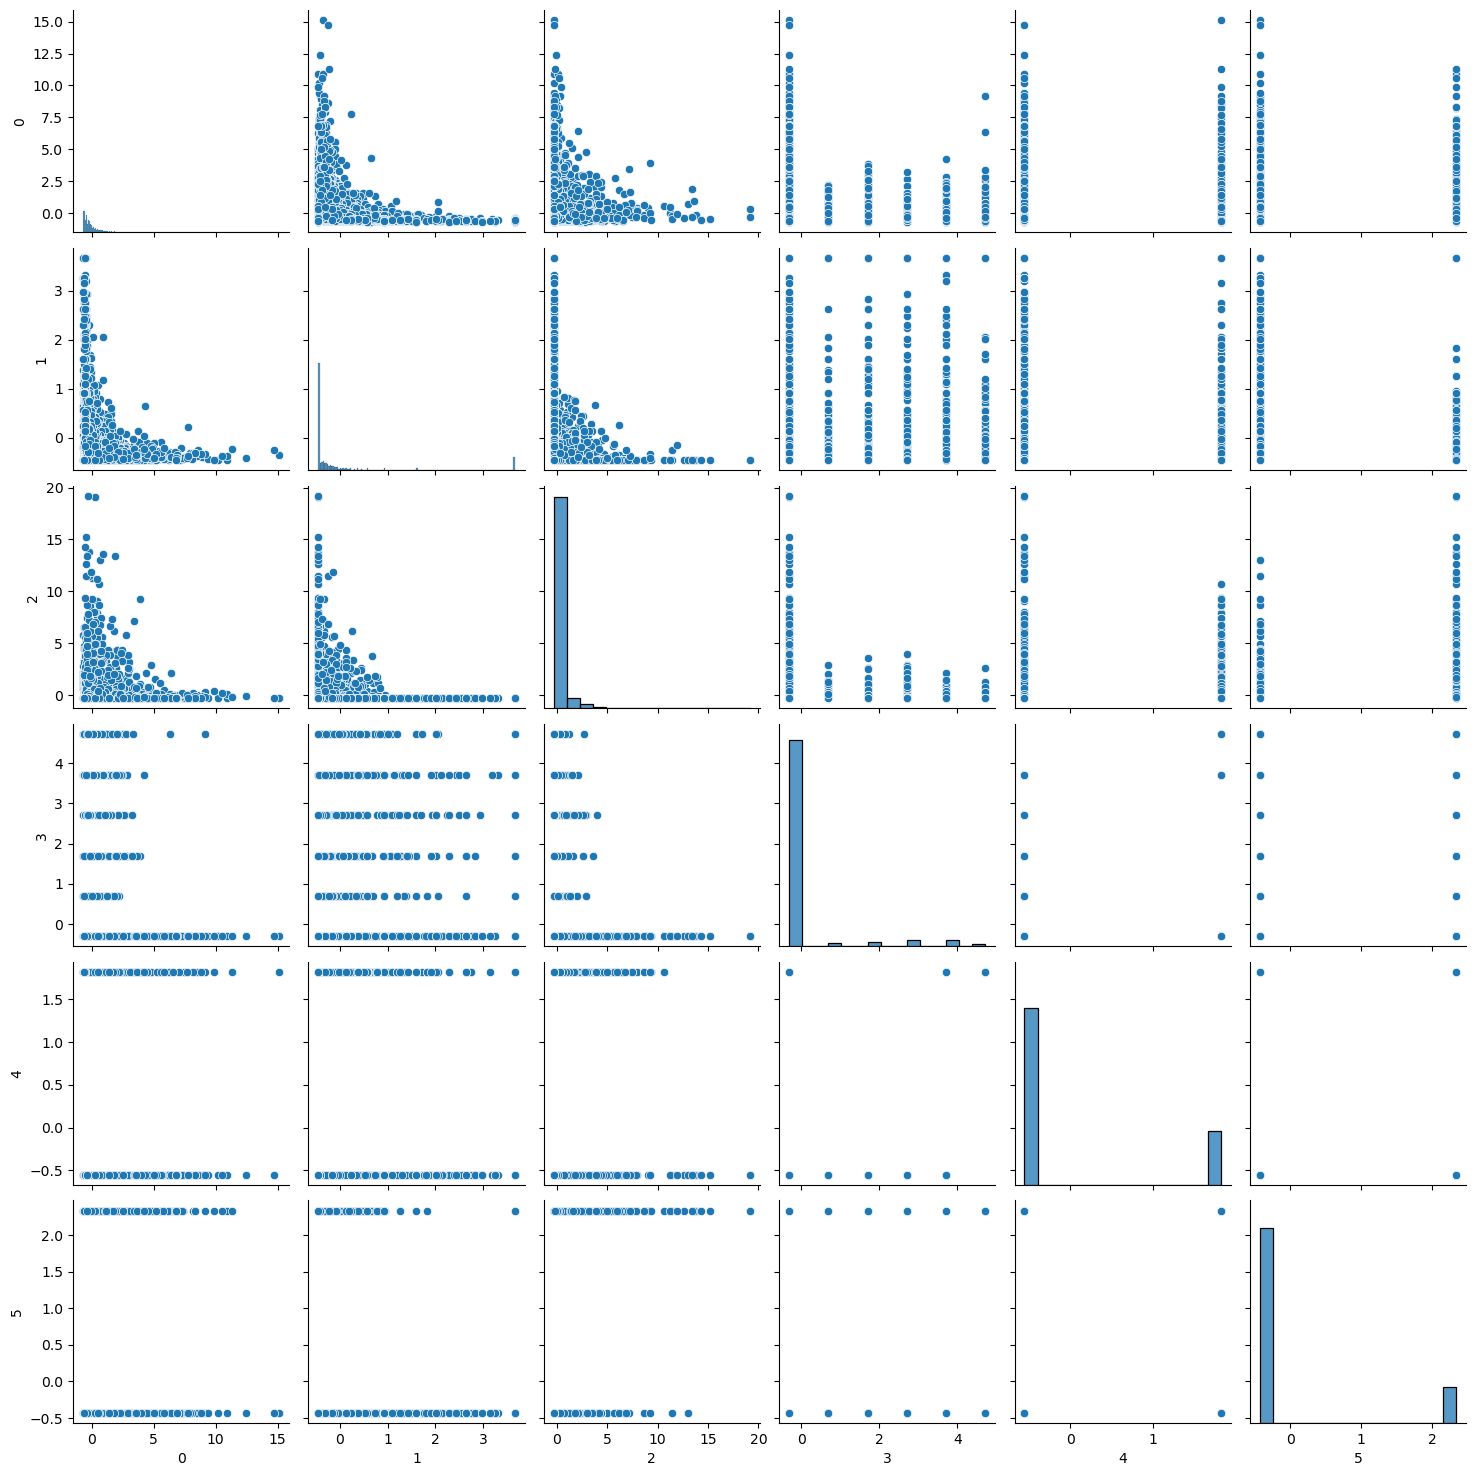

In [25]:
sns.pairplot(pd.DataFrame(df_padronizado))

In [27]:
kmeans.fit(df_padronizado)


KMeans(max_iter=600, n_clusters=3)

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [31]:
# Criar e treinar o modelo com 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Ajustar o modelo e adicionar os rótulos ao DataFrame
df['Cluster_4'] = kmeans_4.fit_predict(df_padronizado)

df.groupby('Cluster_4')[features].mean().round(2)



,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend
Cluster_4,,,,,
0,27.61,0.04,1.41,0.68,0.15
1,27.90,0.03,1.70,0.00,0.00
2,29.77,0.02,1.58,0.00,1.00
3,50.51,0.01,28.90,0.01,0.26


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [32]:
df.groupby('Cluster_4')['Revenue'].mean().sort_values(ascending=False).round(3)


Cluster_4
3    0.974
0    0.036
1    0.000
2    0.000
Name: Revenue, dtype: float64

In [33]:
df.groupby('Cluster_4')['BounceRates'].mean().round(3)


Cluster_4
0    0.035
1    0.025
2    0.020
3    0.005
Name: BounceRates, dtype: float64

In [34]:
df.groupby('Cluster_4')[['Revenue', 'BounceRates']].mean().round(3).sort_values('Revenue', ascending=False)


,Revenue,BounceRates
Cluster_4,,
3,0.974,0.005
0,0.036,0.035
1,0.000,0.025
2,0.000,0.020


O cluster 3 tem altíssima taxa de conversão (Revenue), quase nenhuma rejeição. Navegação extremamente engajada e orientada à compra (BounceRates) .